In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

#### Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

#### The only output is:

6. Scaled sound pressure level, in decibels.

In [2]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [3]:
df.columns=["Frequency","Angle of attack","chord length","Free-stream velocity","Suction side","pressure level"]

In [4]:
df.head()

,Frequency,Angle of attack,chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
#checking null values

df.isnull().sum()

Frequency               0
Angle of attack         0
chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [6]:
#dependent and independent features

from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

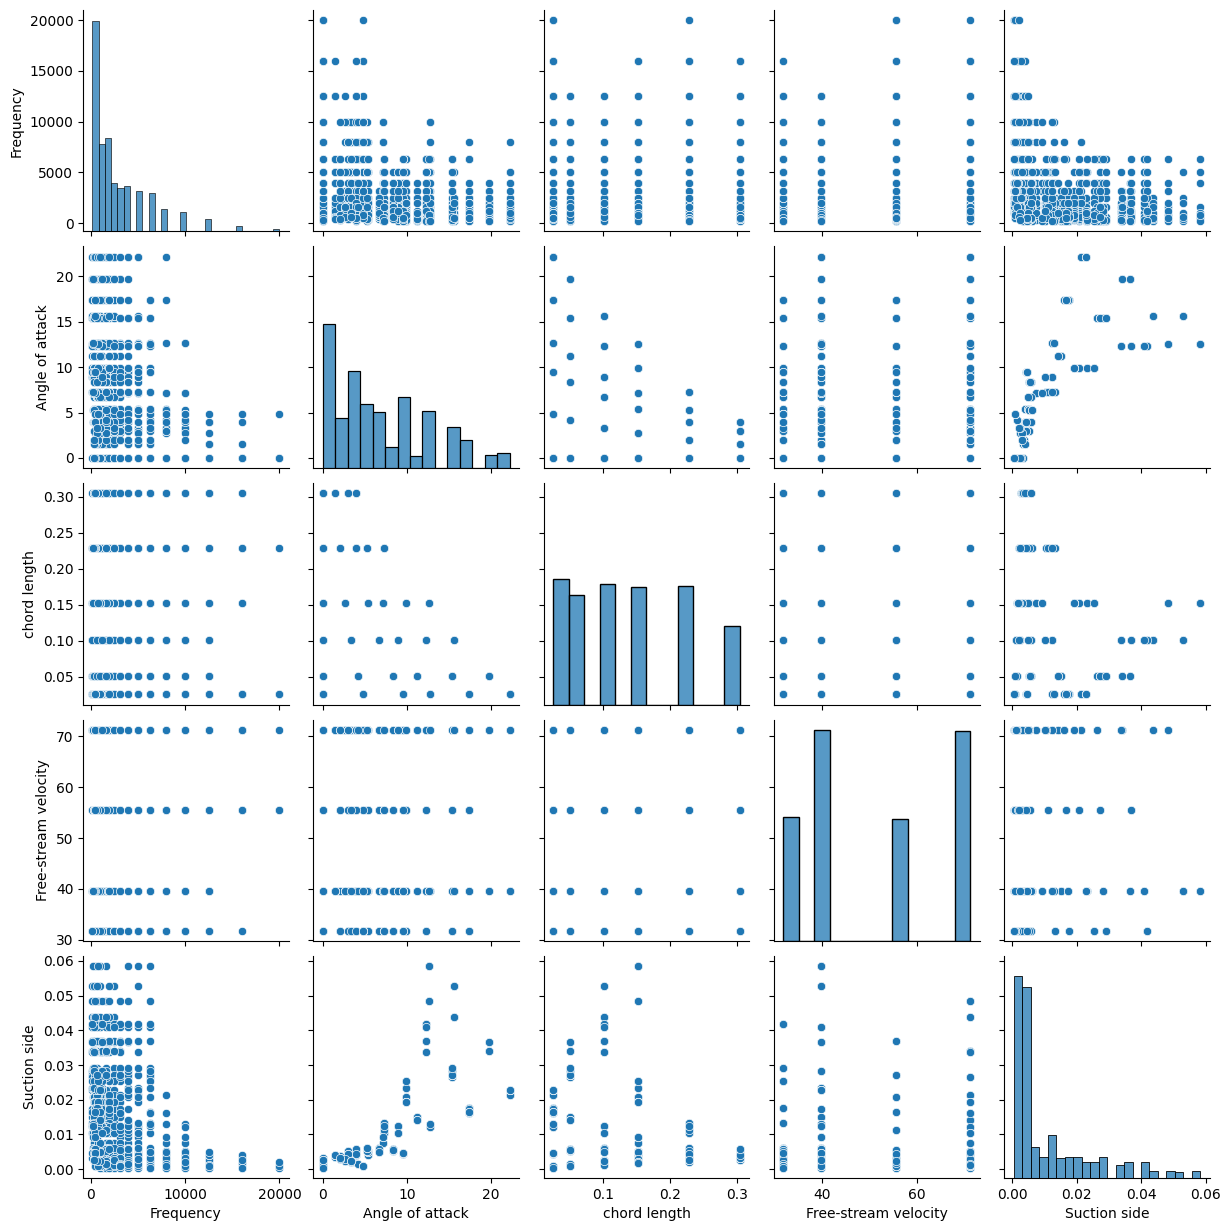

In [7]:
sns.pairplot(X_train)

### Pandas Profiling

The report consist of the following:

1.DataFrame overview

2.Each attribute on which DataFrame is defined

3.Correlations between attributes (Pearson Correlation and Spearman Correlation)

4.A sample of DataFrame.

In [11]:
df_profile=pp.ProfileReport(X_train)

In [12]:
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
sns.boxplot(X_train['Frequency'])

C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

In [9]:
sns.scatterplot(X_train['Frequency'],X_train['Suction side'])

C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Suction side'>

### linear regression

In [28]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regressor=LinearRegression()

linear_regressor=cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)
np.mean(linear_regressor)

-27.188623343053386

### Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
ridge_regressor=Ridge()
parameters={'alpha':[10,3,5,8,12]}
ridge=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridge.fit(X,y)

ridge_predict=ridge.predict(X_test)

Ridge_performance=r2_score(y_test,ridge_predict)
print(ridge.best_params_)
print(ridge.best_score_)
print('the performance of ridge model is: ', Ridge_performance)
sns.distplot(y_test-ridge_predict)

{'alpha': 3}
-30.03331678385924
the performance of ridge model is:  0.49103314701069556


C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

### Lasso Regressor

In [34]:
from sklearn.linear_model import Lasso
lasso= Lasso()
parameters={'alpha': [2,5,10,20,50]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

lasso_predict=lasso_regressor.predict(X_test)
lasso_performace=r2_score(y_test,lasso_predict)
print('parameter choosen :', lasso_regressor.best_params_)
print('lasso model performance is :',lasso_performace)

parameter choosen : {'alpha': 2}
lasso model performance is : 0.24636799091420958


### Elastic Net  Regressor

In [46]:
from sklearn.linear_model import ElasticNet

elasticnet=ElasticNet()
parameters={'alpha':[1,8,9,30,50,60]}
elasticnet_regressor=GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5)

elasticnet_regressor.fit(X,y)
elastic_model=elasticnet_regressor.predict(X_test)
elasticnet_performance=r2_score(y_test,elastic_model)
print('elasticnet model performance is :',elasticnet_performance)

elasticnet model performance is : 0.23158457784629483


### Random forest regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
parameters={'n_estimators':[100],'criterion':['squared_error'],'max_depth':[2]}
randomforest=GridSearchCV(random,parameters,cv=5)
randomforest.fit(X,y)

randomforest_predict=randomforest.predict(X_test)

In [75]:
r2_score(y_test,randomforest_predict)

0.42988881443812477

### Model serilization(model saving)

pickle will convert the entire model into serilized format and save in the form of bites

In [60]:
import pickle 
pickle.dump(randomforest,open('model.pkl','wb'))

In [61]:
pickled_model=pickle.load(open('model.pkl','rb'))
#batch input
pickled_model.predict(X_test)

array([122.82807775, 127.70374513, 127.70374513, 125.25604846,
       118.24725206, 127.70374513, 117.98994371, 123.78761979,
       117.58908032, 127.70374513, 122.82807775, 127.70374513,
       126.9730978 , 127.70374513, 124.73995793, 126.9730978 ,
       126.9730978 , 127.70374513, 117.58908032, 127.70374513,
       125.31334403, 117.58908032, 127.66384903, 118.24725206,
       127.70374513, 123.1029171 , 118.15712278, 123.34556148,
       127.70374513, 125.31334403, 123.34556148, 123.34556148,
       127.70374513, 120.14346866, 127.70374513, 127.70374513,
       127.57130172, 127.70374513, 127.70374513, 118.24725206,
       118.05765259, 124.1050319 , 117.58908032, 127.70374513,
       127.70374513, 127.70374513, 122.86797385, 117.79718666,
       123.21311808, 129.79015222, 129.69738219, 122.82807775,
       117.58908032, 124.7972535 , 125.25604846, 127.70374513,
       117.58908032, 125.36300926, 127.70374513, 117.58908032,
       125.31334403, 118.05765259, 123.55366782, 127.70

In [77]:
dict_test={
    'Frequency':9,
    'Angle of attack': 8,
    'chord length': 10,
    'Free-stream velocity': 1,
    'suction side': 7
}

In [80]:
[list(dict_test.values())]

[[9, 8, 10, 1, 7]]

In [79]:
pickled_model.predict([list(dict_test.values())])

C:\Users\seruvuri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([121.70977388])